## ICRC Protection Data Analysis Test - W Carter

This page represents my technical test answers, for the ICRC Protection Data Analysis application.  It was completed on 4 April 2020.

In [1]:
#preliminaries

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import datetime

plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
#load the downloaded dataset - 1x ACLED conflict dataset for Yemen from Jan-Dec 2019

df = pd.read_csv('./data/Yemen.csv')

In [3]:
#understand the dataset

print(df.shape)

(11440, 31)


In [5]:
df.dtypes

data_id               int64
iso                   int64
event_id_cnty        object
event_id_no_cnty      int64
event_date           object
year                  int64
time_precision        int64
event_type           object
sub_event_type       object
actor1               object
assoc_actor_1        object
inter1                int64
actor2               object
assoc_actor_2        object
inter2                int64
interaction           int64
region               object
country              object
admin1               object
admin2               object
admin3              float64
location             object
latitude            float64
longitude           float64
geo_precision         int64
source               object
source_scale         object
notes                object
fatalities            int64
timestamp             int64
iso3                 object
dtype: object

In [6]:
df.describe()

,data_id,iso,event_id_no_cnty,year,time_precision,inter1,inter2,interaction,admin3,latitude,longitude,geo_precision,fatalities,timestamp
count,1.144000e+04,11440.0,11440.000000,11440.0,11440.000000,11440.000000,11440.000000,11440.000000,0.0,11440.000000,11440.000000,11440.000000,11440.000000,1.144000e+04
mean,6.429973e+06,887.0,36991.793444,2019.0,1.023776,2.779633,1.712762,25.765122,NaN,14.901393,44.012978,1.538724,2.262413,1.575819e+09
std,3.243098e+05,0.0,7117.134963,0.0,0.167656,2.522379,2.317566,22.270060,NaN,1.292734,1.349353,0.589328,4.572810,4.643572e+06
min,4.558355e+06,887.0,22137.000000,2019.0,1.000000,1.000000,0.000000,10.000000,NaN,12.630700,42.133300,1.000000,0.000000,1.552576e+09
25%,6.449512e+06,887.0,29903.750000,2019.0,1.000000,1.000000,0.000000,11.000000,NaN,13.931700,43.105500,1.000000,0.000000,1.576531e+09
50%,6.452948e+06,887.0,40615.500000,2019.0,1.000000,1.000000,1.000000,13.000000,NaN,14.637000,43.483100,1.000000,0.000000,1.576531e+09
75%,6.456288e+06,887.0,43527.250000,2019.0,1.000000,3.000000,3.000000,30.000000,NaN,16.191700,44.623500,2.000000,2.000000,1.576531e+09
max,7.019337e+06,887.0,50330.000000,2019.0,3.000000,8.000000,8.000000,88.000000,NaN,17.801900,54.080300,3.000000,130.000000,1.585692e+09


In [4]:
df.isnull().sum()

data_id                 0
iso                     0
event_id_cnty           0
event_id_no_cnty        0
event_date              0
year                    0
time_precision          0
event_type              0
sub_event_type          0
actor1                  0
assoc_actor_1        8964
inter1                  0
actor2               4141
assoc_actor_2        8484
inter2                  0
interaction             0
region                  0
country                 0
admin1                  0
admin2                  0
admin3              11440
location                0
latitude                0
longitude               0
geo_precision           0
source                  0
source_scale            0
notes                   0
fatalities              0
timestamp               0
iso3                    0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11440 entries, 0 to 11439
Data columns (total 31 columns):
data_id             11440 non-null int64
iso                 11440 non-null int64
event_id_cnty       11440 non-null object
event_id_no_cnty    11440 non-null int64
event_date          11440 non-null object
year                11440 non-null int64
time_precision      11440 non-null int64
event_type          11440 non-null object
sub_event_type      11440 non-null object
actor1              11440 non-null object
assoc_actor_1       2476 non-null object
inter1              11440 non-null int64
actor2              7299 non-null object
assoc_actor_2       2956 non-null object
inter2              11440 non-null int64
interaction         11440 non-null int64
region              11440 non-null object
country             11440 non-null object
admin1              11440 non-null object
admin2              11440 non-null object
admin3              0 non-null float64
location            114

In [8]:
df.head()

,data_id,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,sub_event_type,actor1,...,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp,iso3
0,6768128,887,YEM45982,45982,31 December 2019,2019,1,Battles,Armed clash,Military Forces of Yemen (2012-),...,Habban,14.3541,47.0765,2,Yemen Data Project; Aden al Ghad; Al Janoob al...,Local partner-National,"On 31 December 2019, clashes reportedly erupte...",0,1580761030,YEM
1,6768129,887,YEM45983,45983,31 December 2019,2019,1,Strategic developments,Change to group/activity,Military Forces of Yemen (2012-) Security Belt...,...,Habban,14.3541,47.0765,2,Al Janoob al Youm; Yemen Data Project,Local partner-National,"On 31 December 2019, forces loyal to the South...",0,1580761030,YEM
2,6768130,887,YEM45984,45984,31 December 2019,2019,1,Battles,Armed clash,Military Forces of Yemen (2012-),...,Wadi Haburah,14.2081,47.1570,1,Al Janoob al Youm; Aden al Ghad; Yemen Data Pr...,Local partner-National,"On 31 December 2019, clashes reportedly erupte...",1,1580761030,YEM
3,6760978,887,YEM45977,45977,31 December 2019,2019,1,Strategic developments,Change to group/activity,Operation Restoring Hope,...,Al Alam Military Camp,14.9403,46.6711,1,YNP; Yemen Data Project; Al Masdar,Local partner-National,"On 31 December 2019, Sudanese forces reportedl...",0,1580153672,YEM
4,6760979,887,YEM45985,45985,31 December 2019,2019,1,Strategic developments,Non-violent transfer of territory,Military Forces of Yemen (2012-) Shabwani Elit...,...,Balhaf,13.9667,48.1833,1,Al Masdar; Yemen Data Project; YNP,Local partner-National,"On 31 December 2019, Sudanese forces reportedl...",0,1580153672,YEM


In [9]:
df.tail()

,data_id,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,sub_event_type,actor1,...,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp,iso3
11435,6456772,887,YEM26988,26988,01 January 2019,2019,1,Explosions/Remote violence,Shelling/artillery/missile attack,National Resistance Forces,...,Al Hudaydah-Street 90,14.8355,42.9781,1,Ansar Allah; Yemen Data Project,Local partner-National,"For the third consecutive day, anti-Houthi for...",0,1576530953,YEM
11436,5745348,887,YEM31429,31429,01 January 2019,2019,1,Explosions/Remote violence,Shelling/artillery/missile attack,Military Forces of Yemen (2016-) Supreme Polit...,...,At Tuhayta,14.1836,43.2264,2,Al Amaliqah,Subnational,"On 01 January, pro-Houthi forces shelled civil...",0,1567462128,YEM
11437,5639624,887,YEM26991,26991,01 January 2019,2019,1,Explosions/Remote violence,Shelling/artillery/missile attack,National Resistance Forces,...,At Tuhayta,14.1836,43.2264,1,Ansar Allah,National,"For the second consecutive day, anti-Houthi fo...",0,1563908684,YEM
11438,6127578,887,YEM27000,27000,01 January 2019,2019,1,Battles,Government regains territory,Military Forces of Yemen (2016-) Supreme Polit...,...,Jabal Abu an Nar,16.5258,43.1444,2,Twitter,New media,A day after they fired artillery at pro-Hadi f...,10,1571164643,YEM
11439,5639932,887,YEM27017,27017,01 January 2019,2019,1,Explosions/Remote violence,Remote explosive/landmine/IED,Unidentified Armed Group (Yemen),...,Uqaqah,13.5693,43.9694,1,Al Nokhbah,National,A bomb an unknown origin reportedly exploded i...,0,1563908684,YEM


In [26]:
df.fatalities.sum()

25882

# Assignment 1 - Understand the data

The dataset contains information about conflict activities in Yemen over the 2019 calendar year.  It includes 11,440 entries of different incidents, with 31 columns that provide information on time, location, type, actor, and fatalities (as well as source of info and its credibility), mostly from public media sources.  The majority of columns are complete, except some columns pertaining to different actors (in particular, associated conflict actors and targets [including civilians], as well as the sub-district level of location data). They list 25,882 mortalities in the Yemen conflict over 2019.  It provides a comprehensive overview of conflict patterns in Yemen over one year, and so could inform ICRC's protection strategy for Yemen.  As the source of data depends upon media, it may not provide conflict information regarding hard-to-reach areas where media sources have little coverage, or the full range of protection violations that ICRC may be concerned with, such as detention practices or abuses within these incidents.  It also does not disaggregate between civilian and combatant casualties in a specific incident, but does mark attacks which appear to be perpetrated directly against Yemeni civilians.


# Assignment 2 - Analytical options

Based upon my understanding of the ICRC's mandate and activities, as well as the ACLED data set, please find below three options of operationally useful analytical options:

- Identify seasonal trends of conflict data using time series analysis. This may highlight peak and low periods of conflict and help schedule protection activities and strategies around.
- Identify the main perpetrators, geographies, and modes of armed conflict violence in Yemen, by fatality, to suggest priorities of protection communication/diplomacy/engagement efforts
- Explore trends of civilian casualties from armed conflict in Yemen, particularly by analysing attacks directly targeting civilians

# Assignment 3 - Carry out analysis

The section below is code pertaining to the second analytical output mentioned above, in Assignment 2, i.e. identifying the most deadly perpetrators and modes of conflict.

A separate presentation is included in the folder, to explain the output.

In [10]:
#convert dates to time-series data types
df['event_date'] = pd.to_datetime(df['event_date'])

In [11]:
#understand the prevalence of incidents by governorate
df.admin1.value_counts()

Al Hudaydah         4128
Sadah               1605
Ad Dali             1025
Hajjah               860
Taizz                852
Al Jawf              615
Aden                 456
Al Bayda             364
Abyan                243
Shabwah              236
Sanaa                202
Marib                200
Amanat al Asimah     133
Ibb                  111
Hadramawt            109
Lahij                101
Amran                 49
Al Mahrah             49
Suqutra               48
Dhamar                38
Raymah                 9
Al Mahwit              7
Name: admin1, dtype: int64

In [12]:
#understand the 'distribution' of fatalities by governorate
df.groupby('admin1').fatalities.sum().sort_values(ascending=False)

admin1
Sadah               5681
Ad Dali             4023
Al Jawf             3954
Hajjah              3346
Taizz               2922
Al Hudaydah         1659
Al Bayda            1152
Marib                933
Sanaa                596
Abyan                364
Aden                 301
Shabwah              258
Lahij                204
Dhamar               173
Ibb                  157
Amran                 58
Hadramawt             53
Amanat al Asimah      41
Al Mahrah              5
Al Mahwit              1
Raymah                 1
Suqutra                0
Name: fatalities, dtype: int64

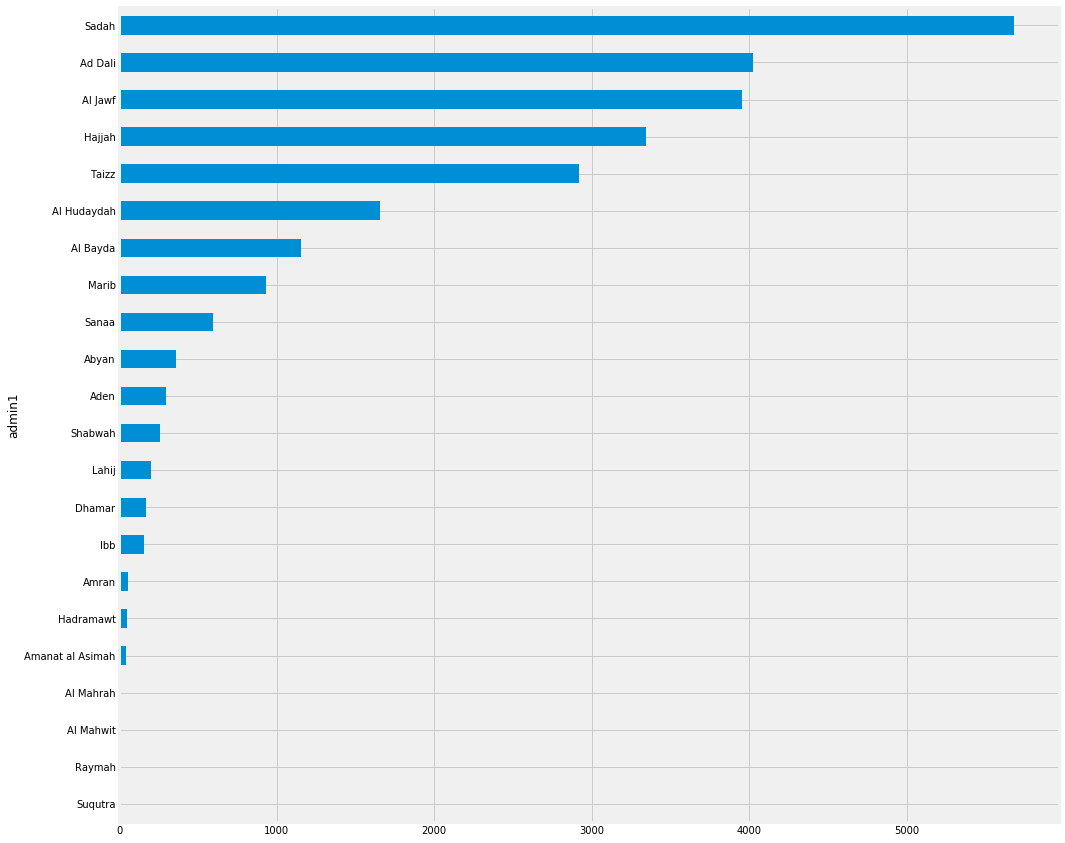

In [13]:
#display as a horizontal bar chart
df.groupby('admin1').fatalities.sum().sort_values(ascending=True).plot(kind='barh', figsize=(15,15));

In [14]:
#understand the proportion of conflict incidents by type (typology from ACLED dataset codebook)
df.sub_event_type.value_counts()

Shelling/artillery/missile attack      4181
Armed clash                            3097
Air/drone strike                       1260
Remote explosive/landmine/IED           619
Attack                                  464
Change to group/activity                462
Government regains territory            365
Peaceful protest                        351
Disrupted weapons use                   170
Looting/property destruction            117
Abduction/forced disappearance           63
Other                                    52
Non-state actor overtakes territory      45
Non-violent transfer of territory        45
Arrests                                  38
Violent demonstration                    32
Agreement                                23
Grenade                                  20
Excessive force against protesters       16
Headquarters or base established          7
Suicide bomb                              5
Mob violence                              4
Protest with intervention       

In [15]:
#understand the 'distribution' of fatalities by conflict incident type
df.groupby('sub_event_type').fatalities.sum().sort_values(ascending=False)

sub_event_type
Armed clash                            13875
Shelling/artillery/missile attack       4082
Remote explosive/landmine/IED           2882
Air/drone strike                        2662
Government regains territory            1659
Attack                                   330
Disrupted weapons use                    173
Non-state actor overtakes territory      159
Suicide bomb                              36
Excessive force against protesters        12
Grenade                                    9
Violent demonstration                      3
Agreement                                  0
Arrests                                    0
Change to group/activity                   0
Headquarters or base established           0
Looting/property destruction               0
Mob violence                               0
Non-violent transfer of territory          0
Other                                      0
Peaceful protest                           0
Protest with intervention               

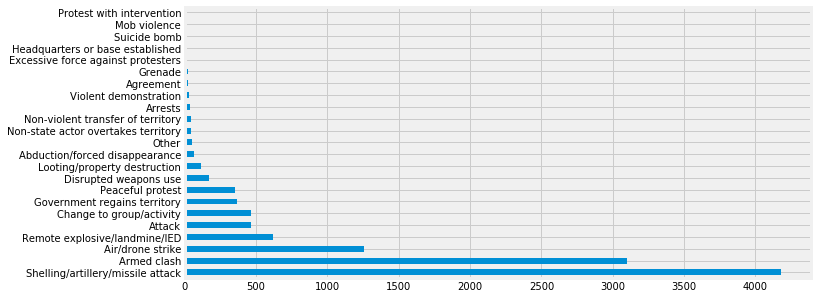

In [16]:
#display as a horizontal bar chart
df.sub_event_type.value_counts().plot(kind='barh', figsize=(10,5));

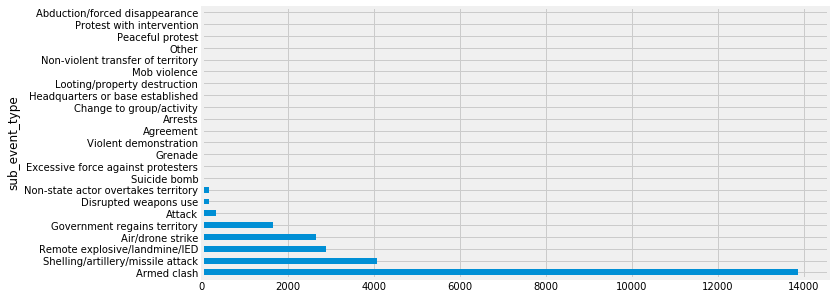

In [17]:
df.groupby('sub_event_type').fatalities.sum().sort_values(ascending=False).plot(kind='barh', figsize=(10,5));

In [18]:
df.actor1.value_counts()

Military Forces of Yemen (2016-) Supreme Political Council                                                                   4548
National Resistance Forces                                                                                                   2159
Operation Restoring Hope                                                                                                     1743
Military Forces of Yemen (2012-)                                                                                             1191
Unidentified Armed Group (Yemen)                                                                                              375
                                                                                                                             ... 
Bani Nawf Tribal Militia (Yemen)                                                                                                1
Sadah Tribal Militia (Yemen)                                                              

In [25]:
df.groupby('actor1').fatalities.sum().sort_values(ascending=False)

actor1
Military Forces of Yemen (2016-) Supreme Political Council    14612
Military Forces of Yemen (2012-)                               5155
Operation Restoring Hope                                       2594
National Resistance Forces                                     1198
Military Forces of Yemen (2012-) Security Belt Forces           367
                                                              ...  
Imran Tribal Militia (Yemen)                                      0
Government of Yemen (2016-) Supreme Political Council             0
Government of Yemen (2012-)                                       0
Damashqa Tribal Militia (Yemen)                                   0
Military Forces of Yemen (2012-) Amajid Brigade                   0
Name: fatalities, Length: 105, dtype: int64

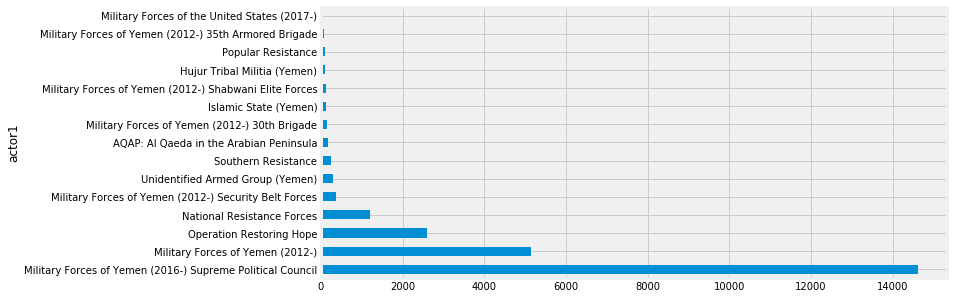

In [19]:
df.groupby('actor1').fatalities.sum().sort_values(ascending=False).head(15).plot(kind='barh', figsize=(10,5));

In [20]:
df.actor2.value_counts()

Military Forces of Yemen (2012-)                              1963
Military Forces of Yemen (2016-) Supreme Political Council    1936
Civilians (Yemen)                                             1265
National Resistance Forces                                    1144
Military Forces of Yemen (2012-) Security Belt Forces          131
                                                              ... 
Al Shabwani Tribal Militia (Yemen)                               1
Muhrabi Tribal Militia (Yemen)                                   1
Police Forces of Yemen (2012-) Prison Guards                     1
Al Laqmush Tribal Militia (Yemen)                                1
Dhu Yahyah Tribal Militia (Yemen)                                1
Name: actor2, Length: 99, dtype: int64

In [28]:
df.groupby('actor2').fatalities.sum().sort_values(ascending=False)

actor2
Military Forces of Yemen (2012-)                              12801
Military Forces of Yemen (2016-) Supreme Political Council     9206
Civilians (Yemen)                                              1212
National Resistance Forces                                      342
Operation Restoring Hope                                        333
                                                              ...  
Baqtiyan Tribal Militia (Yemen)                                   0
Protesters (Yemen)                                                0
Bani Najm ad Din Tribal Militia (Yemen)                           0
As Sawraqi Clan Tribal Militia (Yemen) Abduh Faction              0
Military Forces of Yemen (2012-) 170th Air Defence Brigade        0
Name: fatalities, Length: 99, dtype: int64

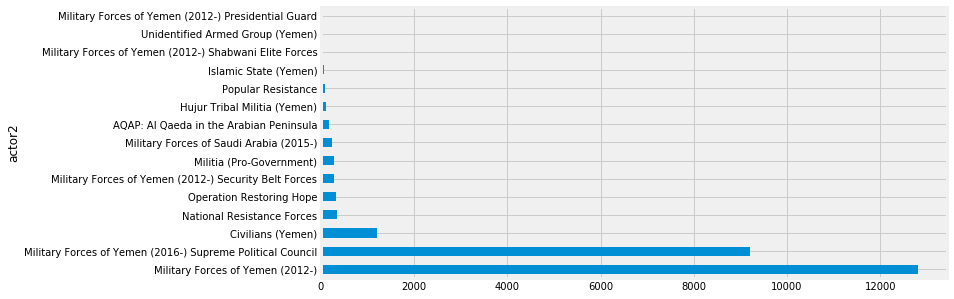

In [21]:
df.groupby('actor2').fatalities.sum().sort_values(ascending=False).head(15).plot(kind='barh', figsize=(10,5));

## 